INTRODUCTION

Before Entering Into Notebook ,I am going to give brief introduction about Data used,

What is this?: Data representing the weather conditions on Mars from Sol 1 (August 7, 2012 on Earth) to Sol 1895 (February 27, 2018 on Earth).

Source(s) & Methodology: This data was measured and transmitted via the Rover Environmental Monitoring Station (REMS) on-board the Curiosity Rover. The data was made publicly available by NASA’s Mars Science Laboratory and the Centro de Astrobiología (CSIC-INTA). The Centro de Astrobiología offers a widget and a disclaimer regarding the data collected by Curiosity here.


Attributes Description

•  id - The identification number of a single transmission

•  terrestrial_date - The date on Earth (formatted as month/day/year or m/dd/yy).

•   ls - The solar longitude or the Mars-Sun angle, measured from the Northern Hemisphere. In the Northern Hemisphere, the spring equinox is when ls = 0. Since Curiosity is in the Southern Hemisphere, the following ls values are of importance:
• ls = 0: autumnal equinox
• ls = 90 : winter solstice
• ls = 180 : spring equinox
• ls = 270 : summer solstice




•  month - The Martian Month. Similarly to Earth, Martian time can be divided into 12 months.


•  min_temp - The minimum temperature (in °C) observed during a single Martian sol.

•  max_temp - The maximum temperature (in °C) observed during a single Martian sol.


•  pressure - The atmospheric pressure (Pa) in Curiosity's location on Mars.


•  wind_speed - The average wind speed (m/s) measured in a single sol. Note: Wind Speed data has not be transmitted to Earth since Sol 1485. Missing values are coded as NaN.


•  atmo_opacity - Description of the overall weather conditions on Mars for a given sol based on atmospheric opacity (e.g., Sunny).[tahsinpasha]

tahseenpasha81@gmail.com

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/marswath ds/mars-weather.csv')

data.sample(5)

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
1385,510,2014-03-11,567,100,Month 4,-86.0,-28.0,827.0,NaN,Sunny
271,1623,2017-05-23,1705,8,Month 1,-76.0,-11.0,845.0,NaN,Sunny
1870,173,2012-09-06,31,167,Month 6,-74.0,-23.0,745.0,NaN,Sunny
1577,318,2013-07-31,350,359,Month 12,-76.0,-6.0,853.0,NaN,Sunny
1000,894,2015-04-21,962,329,Month 11,-73.0,-2.0,845.0,NaN,Sunny


In [ ]:
data.describe()

,id,sol,ls,min_temp,max_temp,pressure,wind_speed
count,1894.000000,1894.000000,1894.000000,1867.000000,1867.000000,1867.000000,0.0
mean,948.372228,1007.930306,169.180570,-76.121050,-12.510445,841.066417,NaN
std,547.088173,567.879561,105.738532,5.504098,10.699454,54.253226,NaN
min,1.000000,1.000000,0.000000,-90.000000,-35.000000,727.000000,NaN
25%,475.250000,532.250000,78.000000,-80.000000,-23.000000,800.000000,NaN
50%,948.500000,1016.500000,160.000000,-76.000000,-11.000000,853.000000,NaN
75%,1421.750000,1501.750000,259.000000,-72.000000,-3.000000,883.000000,NaN
max,1895.000000,1977.000000,359.000000,-62.000000,11.000000,925.000000,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1894 non-null   int64  
 1   terrestrial_date  1894 non-null   object 
 2   sol               1894 non-null   int64  
 3   ls                1894 non-null   int64  
 4   month             1894 non-null   object 
 5   min_temp          1867 non-null   float64
 6   max_temp          1867 non-null   float64
 7   pressure          1867 non-null   float64
 8   wind_speed        0 non-null      float64
 9   atmo_opacity      1894 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 148.1+ KB


In [ ]:

obj_cols=data.select_dtypes(include='object')

obj_cols.sample(5)

,terrestrial_date,month,atmo_opacity
986,2015-05-05,Month 12,Sunny
1254,2014-07-24,Month 6,Sunny
1670,2013-04-23,Month 11,Sunny
1335,2014-05-02,Month 5,Sunny
1328,2014-05-09,Month 5,Sunny


In [ ]:
data.head()

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny


In [ ]:

data['terrestrial_date']=pd.to_datetime(data['terrestrial_date'])

data.terrestrial_date.sample(5)

,terrestrial_date
300,2017-04-23
472,2016-10-28
357,2017-02-23
1426,2014-01-28
668,2016-03-31


In [ ]:
data.columns

Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'max_temp',
       'pressure', 'wind_speed', 'atmo_opacity'],
      dtype='object')

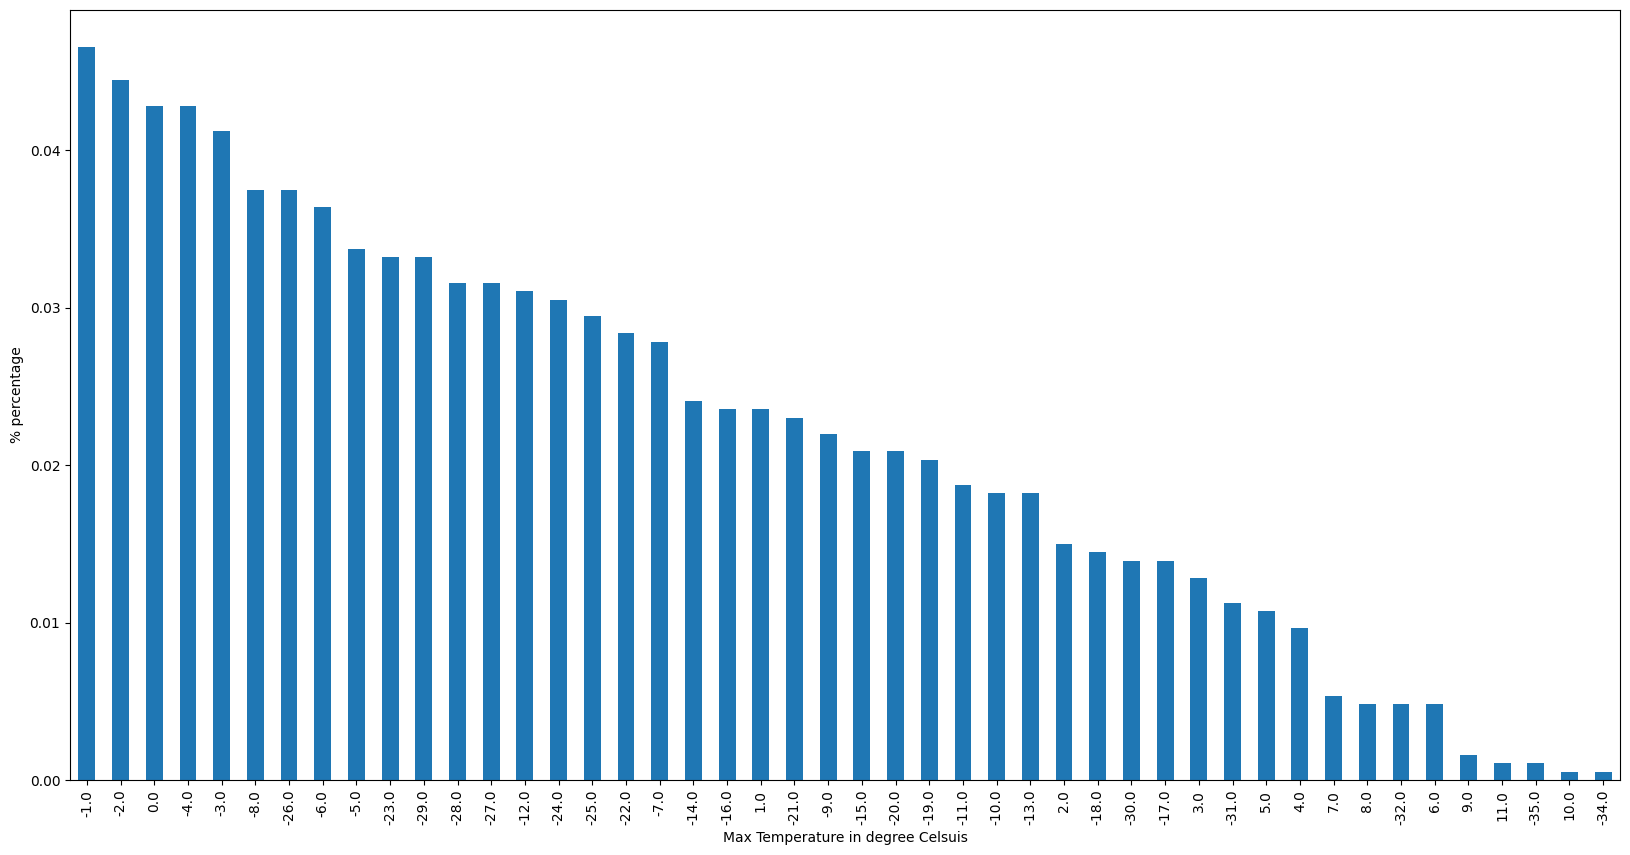

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
data.iloc[:,6].value_counts(normalize=True,sort=True).plot(kind='bar')
plt.xlabel('Max Temperature in degree Celsuis')
plt.ylabel('% percentage')
plt.show()

In [ ]:
data.iloc[:,6].isna().sum()
import datetime as dt
# let's impute the misisng values by the mean of the month

data['month']=pd.to_datetime(data.terrestrial_date).dt.to_period('M')

data.month.value_counts()

,count
month,
2017-12,31
2013-01,31
2016-08,31
2014-05,31
2014-10,31
...,...
2015-01,23
2016-07,21
2012-08,18


In [ ]:
aa=data.iloc[:,6].name
ac=data.groupby(by='month')[aa].mean()
ab=data['max_temp'].isna()
data.loc[ab,['max_temp']]=data.loc[ab,'month'].apply(lambda x:ac[x])
data['max_temp'].isna().sum()
new_df=pd.DataFrame(list(data['max_temp']),index=data.terrestrial_date,columns=['Maxtemperature'])
new_df=new_df.resample('D').mean()
new_df


,Maxtemperature
terrestrial_date,
2012-08-07,-10.615385
2012-08-08,NaN
2012-08-09,NaN
2012-08-10,NaN
2012-08-11,NaN
...,...
2018-02-23,-18.000000
2018-02-24,-13.000000
2018-02-25,-16.000000


In [ ]:
month_df=new_df.resample('M').mean()
month_df

<ipython-input-14-3eef9e6481fb>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_df=new_df.resample('M').mean()


,Maxtemperature
terrestrial_date,
2012-08-31,-10.615385
2012-09-30,-8.107143
2012-10-31,-1.600000
2012-11-30,-2.724138
2012-12-31,-3.666667
...,...
2017-10-31,-29.100000
2017-11-30,-27.827586
2017-12-31,-24.741935


In [ ]:
year_df=new_df.resample('Y').mean()
year_df

<ipython-input-15-82e24ed104c4>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  year_df=new_df.resample('Y').mean()


,Maxtemperature
terrestrial_date,
2012-12-31,-4.876353
2013-12-31,-10.547528
2014-12-31,-11.377465
2015-12-31,-14.744816
2016-12-31,-10.002899
2017-12-31,-17.362288
2018-12-31,-19.214286


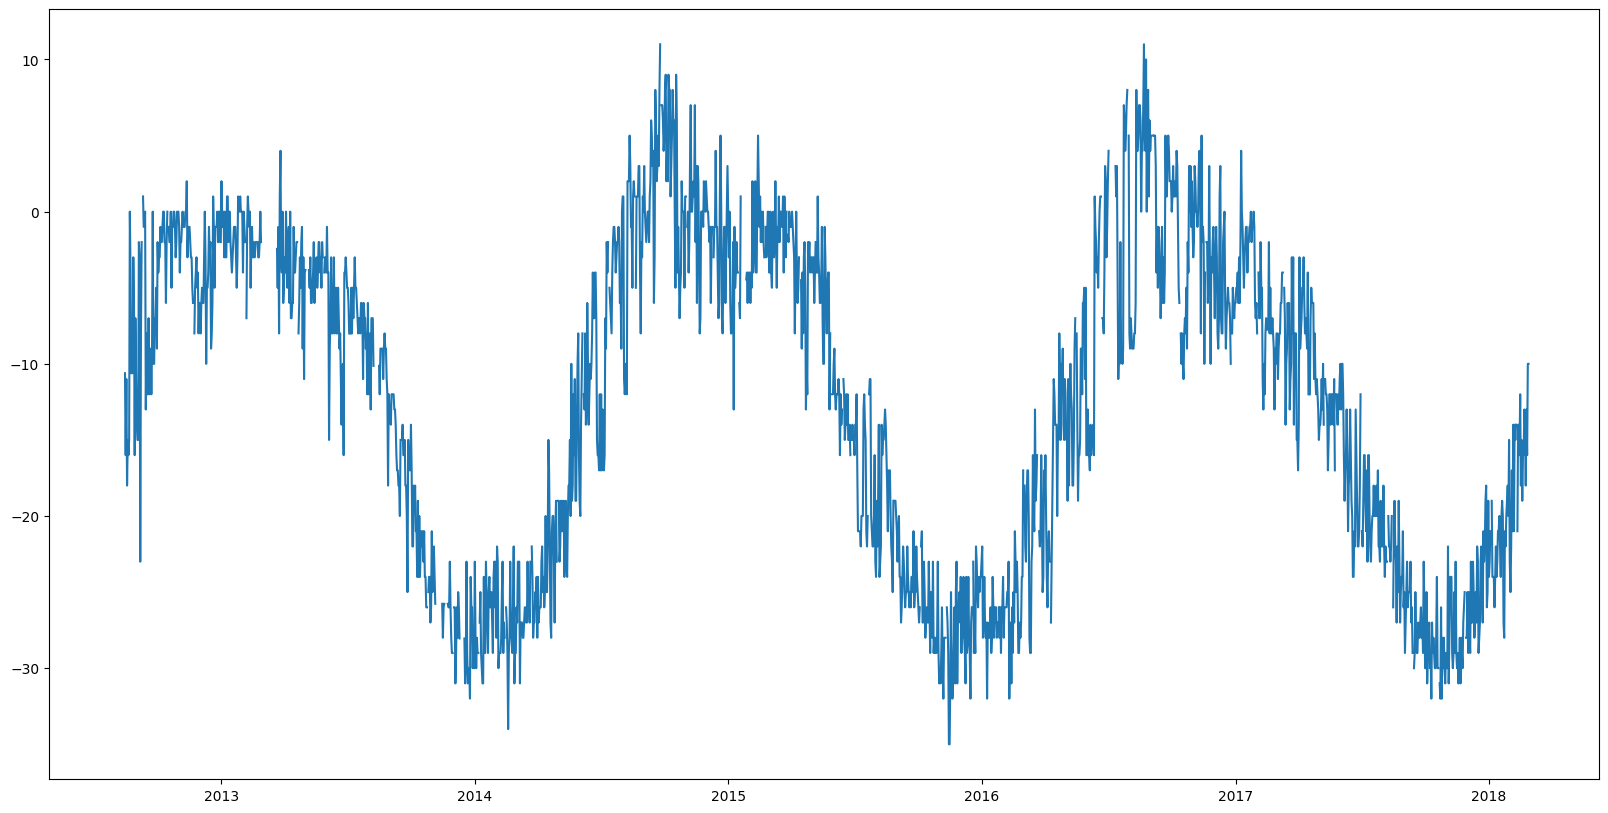

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(new_df)
plt.show()

In [ ]:
from keras.layers import Bidirectional,LSTM,Dense,Flatten,Conv1D,MaxPooling1D,Dropout,RepeatVector
from keras.models import Sequential
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

early_stop=EarlyStopping(monitor='loss',patience=5)
model=Sequential([Conv1D(100,kernel_size=3,input_shape=(30,1),activation='relu'),
                  Conv1D(100,kernel_size=3),
                  Conv1D(100,kernel_size=3),
                  MaxPooling1D(2),
                 Flatten(),
                  RepeatVector(30),
                 LSTM(128,activation='relu',return_sequences=True),
                 LSTM(128,activation='relu',return_sequences=True),
                  Bidirectional(LSTM(64,activation='relu')),
                 Dense(128,activation='relu'),
                 Dense(1)])

model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
new_df1=pd.DataFrame(list(data['max_temp']), index=data['terrestrial_date'], columns=['temp'])
new_df1

,temp
terrestrial_date,
2018-02-27,-10.000000
2018-02-26,-10.000000
2018-02-25,-16.000000
2018-02-24,-13.000000
2018-02-23,-18.000000
...,...
2012-08-18,-18.000000
2012-08-17,-11.000000
2012-08-16,-16.000000


In [ ]:
new_df1=new_df1.resample('D').mean()
new_df1.temp.isna().sum()
new_df1.fillna(data['max_temp'].mean(),inplace=True)
new_df1.temp.isna().sum()
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(-1,1))
scaled_data=scaler.fit_transform(new_df1)
scaled_data[:5]

array([[ 0.06020067],
       [-0.02116299],
       [-0.02116299],
       [-0.02116299],
       [-0.02116299]])

In [ ]:
steps=30
inp1=[]
out1=[]

for i in range(len(scaled_data)-steps):
    inp1.append(scaled_data[i:i+steps])
    out1.append(scaled_data[i+steps])


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step


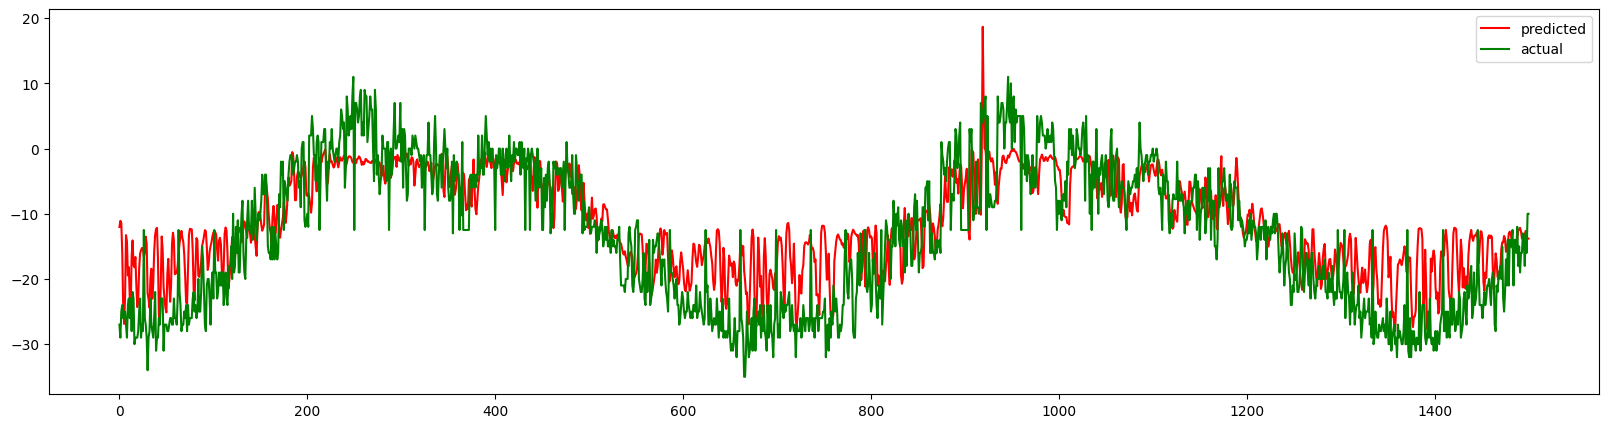

In [ ]:
inp1=np.asanyarray(inp1)
out1=np.asanyarray(out1)
x_train1=inp1[:500,:,:]
x_test1=inp1[500:,:,:]
y_train1=out1[:500]
y_test1=out1[500:]
predicted=model.predict(x_test1)
predicted1=scaler.inverse_transform(predicted)
y_test2=scaler.inverse_transform(y_test1)
plt.figure(figsize=(20,5))
plt.plot(predicted1,'r',label='predicted')
plt.plot(y_test2,'g',label='actual')
plt.legend()
plt.show()

In [ ]:
 model.fit(x_train1,y_train1,epochs=20)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 300ms/step - accuracy: 0.0000e+00 - loss: 0.0308
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 265ms/step - accuracy: 0.0000e+00 - loss: 0.0261
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 389ms/step - accuracy: 0.0000e+00 - loss: 0.0309
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 323ms/step - accuracy: 0.0000e+00 - loss: 0.0274
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 390ms/step - accuracy: 0.0000e+00 - loss: 0.0257
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 365ms/step - accuracy: 0.0000e+00 - loss: 0.0276
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 307ms/step - accuracy: 0.0000e+00 - loss: 0.0265
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 270ms/step - accuracy: 0.0000e+00 - loss: 0.0215
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 366ms/step - accuracy: 0.0000e+00 - loss: 0.0248
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 249ms/step - accuracy: 0.0000e+00 - loss: 0.0206
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 423ms/step - accuracy: 0.0000e+00 - loss: 0.0222
Epoch